In [1]:
import pandas as pd
import scanpy as sc
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd4_8_s1 = sc.read("/mnt/data/project/stag_analysis/result/TNRC18/S1/Annotated_phenotype_hypr_seq.h5ad")
cd4_8_s2 = sc.read("/mnt/data/project/stag_analysis/result/TNRC18/S2/Annotated_phenotype_hypr_seq.h5ad")

s1_annotation = sc.read("/mnt/data/project/stag_analysis/result/TNRC18/S1/annotated_cell_type_leiden.h5ad")
s2_annotation = sc.read("/mnt/data/project/stag_analysis/result/TNRC18/S2/annotated_cell_type_leiden.h5ad")

In [3]:
cd4_8_s1.obs["cell_type"] = s1_annotation.obs["cell_type"]
cd4_8_s2.obs["cell_type"] = s2_annotation.obs["cell_type"]

In [4]:
th1 = sc.read("/mnt/data/project/25_02_15_stag_analysis/merge_annotate_result/TNRC18_Th1/Annotated_phenotype_hypr_seq.h5ad")


In [5]:
th1 = th1[:, th1.var_names=="TNRC18"]

In [6]:
cd4_s1 = cd4_8_s1[cd4_8_s1.obs["cell_type"]=="CD4", cd4_8_s1.var_names=="TNRC18"]
cd8_s1 =  cd4_8_s1[cd4_8_s1.obs["cell_type"]=="CD8", cd4_8_s1.var_names=="TNRC18"]

cd4_s2 =  cd4_8_s2[cd4_8_s2.obs["cell_type"]=="CD4", cd4_8_s2.var_names=="TNRC18"]
cd8_s2 =  cd4_8_s2[cd4_8_s2.obs["cell_type"]=="CD8", cd4_8_s2.var_names=="TNRC18"]

In [7]:
cd4 = sc.concat([cd4_s1, cd4_s2])

/mnt/data/miniconda3/envs/pid/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
cd8 = sc.concat([cd8_s1, cd8_s2])

/mnt/data/miniconda3/envs/pid/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
print(cd4.obs["genotype_annotation"].unique())

['AAV_ACBE3', 'TNRC18-rs748670681_hom_bystander', 'TNRC18-SPA17new_hom_pure', 'TNRC18-SPA17new_hom_bystander', 'mixed', ..., 'TNRC18-rs748670681_hom_pure', 'TNRC18-SPA19_het_pure', 'TNRC18-rs748670681_het_pure', 'TNRC18-SPA17new_het_bystander', 'TNRC18-SPA19_het_bystander']
Length: 15
Categories (15, object): ['AAV_ACBE3', 'TNRC18-SPA17new_het_bystander', 'TNRC18-SPA17new_het_pure', 'TNRC18-SPA17new_hom_bystander', ..., 'TNRC18-rs748670681_hom_bystander', 'TNRC18-rs748670681_hom_pure', 'mixed', 'unedited']


In [10]:
cd4 = cd4[(cd4.obs["genotype_annotation"]=="TNRC18-rs748670681_hom_pure")|(cd4.obs["genotype_annotation"]=="TNRC18-rs748670681_het_pure")|(cd4.obs["genotype_annotation"]=='AAV_ACBE3')]

cd8 = cd8[(cd8.obs["genotype_annotation"]=="TNRC18-rs748670681_hom_pure")|(cd8.obs["genotype_annotation"]=="TNRC18-rs748670681_het_pure")|(cd8.obs["genotype_annotation"]=='AAV_ACBE3')]

th1 = th1[(th1.obs["genotype_annotation"]=="22_hom")|(th1.obs["genotype_annotation"]=="22_het")|(th1.obs["genotype_annotation"]=='AAV_ACBE3')]



In [11]:
th1.obs["genotype_annotation"] = th1.obs["genotype_annotation"].replace({
    "22_het": "TNRC18-rs748670681_het_pure",
    "22_hom": "TNRC18-rs748670681_hom_pure"
})

/tmp/ipykernel_102061/1929765633.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  th1.obs["genotype_annotation"] = th1.obs["genotype_annotation"].replace({
/tmp/ipykernel_102061/1929765633.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  th1.obs["genotype_annotation"] = th1.obs["genotype_annotation"].replace({


In [12]:
data = {
    "CellType": ["cd4"] * len(cd4) + ["cd8"]*len(cd8) + ["th1"]*len(th1),
    "Genotype": list(cd4.obs["genotype_annotation"]) + list(cd8.obs["genotype_annotation"]) + list(th1.obs["genotype_annotation"]),
    "TNRC18": list(cd4.X.reshape(-1)) + list(cd8.X.reshape(-1)) + list(th1.X.reshape(-1))
}

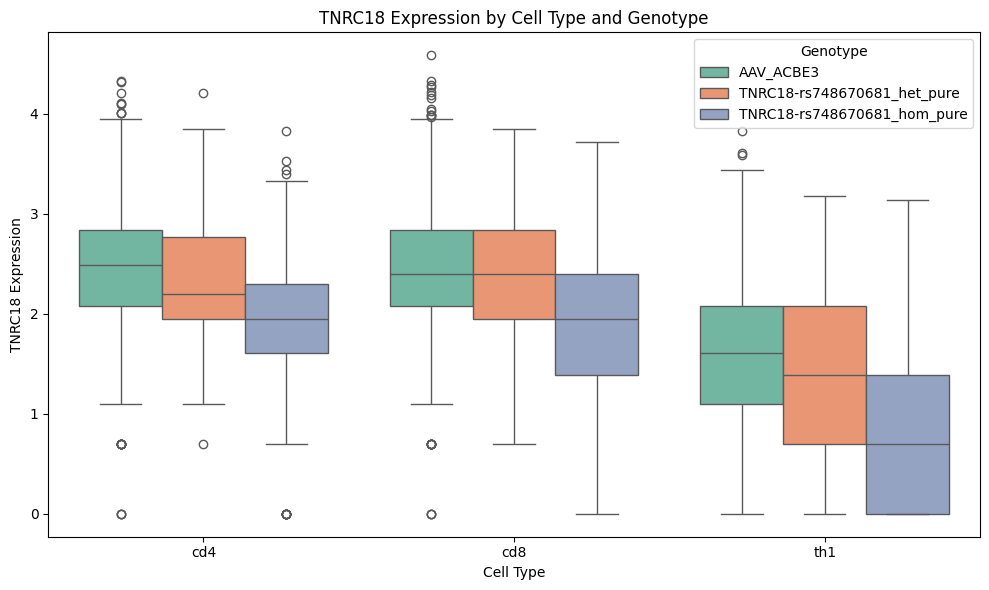

In [ ]:
df = pd.DataFrame(data)

df['TNRC18'] = np.log1p(df['TNRC18'])

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="CellType", y="TNRC18", hue="Genotype", data=df,
        hue_order=['AAV_ACBE3', 'TNRC18-rs748670681_het_pure', 'TNRC18-rs748670681_hom_pure'],
            palette="Set2")  # You can choose any palette you prefer

# Customize the plot
plt.xlabel("Cell Type")
plt.ylabel("TNRC18 Expression")
plt.title("TNRC18 Expression by Cell Type and Genotype")
#plt.yscale("log")
plt.legend(title="Genotype")
# plt.savefig("figure4d.png", dpi=300)
# pltfig("figure4d.svg", dpi=300)
plt.tight_layout()
plt.show()

